# Packages

In [3]:
import numpy as np
from numpy import ndarray

from sklearn.datasets import load_boston

import matplotlib.pyplot as plt

# Boston Data

In [2]:
boston = load_boston()

In [18]:
data = boston.data
print(data.shape)
data[:1,]

(506, 13)


array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [13]:
target = boston.target
print(target.shape)
target[:10]

(506,)


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [19]:
features = boston.feature_names
print(features.shape)
features

(13,)


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Scikit Learn

In [23]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

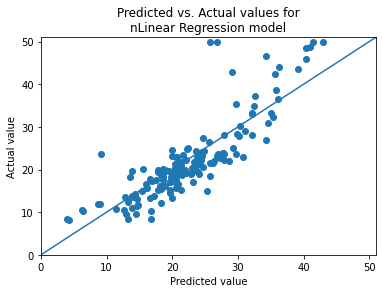

In [26]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\nnLinear Regression model")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51]);
# plt.savefig(IMG_FILEPATH + "00_linear_real_pred_vs_actual.png");

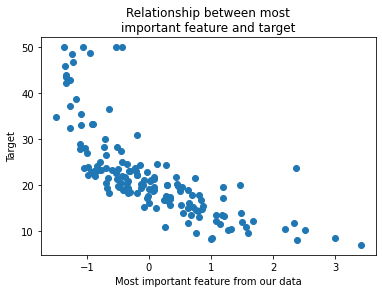

In [27]:
plt.scatter(X_test[:, 12], y_test)
plt.xlabel("Most important feature from our data")
plt.ylabel("Target")
plt.title("Relationship between most\nimportant feature and target");
# plt.savefig(IMG_FILEPATH + "02_most_important_feature_vs_target.png")

In [28]:
def mae(preds: ndarray, actuals: ndarray):
    '''
    Compute mean absolute error.
    '''
    return np.mean(np.abs(preds - actuals))

def rmse(preds: ndarray, actuals: ndarray):
    '''
    Compute root mean squared error.
    '''
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

In [29]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 3.5671 
Root mean squared error: 5.0476


In [30]:
np.round(lr.coef_, 2)

array([[-1.01,  0.71,  0.28,  0.71, -2.21,  2.38,  0.71, -2.66,  2.63,
        -1.82, -2.33,  0.85, -4.19]])

# Reproduction

In [75]:
class LinearRegression:
    
    def __init__(self, X: ndarray, y: ndarray) -> None:
        
        # initialization
        self.X = X
        self.y = y
        self.W = np.random.randn(X.shape[1], 1)
        self.B = np.random.randn(1, 1)
        
        # forward pass
        self.N = self.X @ self.W
        self.P = self.N + self.B
        self.L = np.mean(np.power(7 - self.P, 2))
        
        # backward pass
        self.dLdP = -2 * (self.y - self.P)
        self.dPdN = np.ones_like(self.N)
        self.dPdB = np.ones_like(self.B)
        self.dLdN = self.dLdP * self.dPdN
        self.dNdW = self.X.T
        self.dLdW = self.dNdW @ self.dLdN
        self.dLdB = (self.dLdP * self.dPdB).sum(axis=0)

In [76]:
reg = LinearRegression(X=X_train, y=y_train)

In [88]:
reg.W

array([[ 0.67434465],
       [ 1.38327089],
       [ 0.7738206 ],
       [-1.34749391],
       [ 0.1361714 ],
       [ 1.15723094],
       [-0.71910721],
       [-0.1080781 ],
       [-0.3616188 ],
       [ 1.17549973],
       [-0.30108054],
       [ 0.91467855],
       [-0.54635174]])

In [121]:
reg.dLdP.shape

(354, 1)

In [104]:
print(reg.W.shape, reg.dLdW.shape,)

(13, 1) (13, 1)


In [4]:
X = np.array([[2, 7, 9],
             [5, 3, 1]])
print(X.shape)
W = np.array([[1, 1],
             [1, 1],
             [1, 1]])
print(W.shape)
b = np.array([[100, 0]])
print(b.shape)

(2, 3)
(3, 2)
(1, 2)


In [5]:
X @ W

array([[18, 18],
       [ 9,  9]])

In [6]:
X @ W + b

array([[118,  18],
       [109,   9]])

(5,)

In [134]:
np.sum(np.array([[1, 2, 3],
                 [1, 2, 3]]), axis=0)

array([2, 4, 6])